# Thera Bank Personal Loan Campaign

## Background
Thera Bank management wants to explore ways of converting its liability customers to personal loan customers. A previous campaign had an observed success rate of 9%.

## Data
A dataset has been provided with data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan).

## Attribute Information
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (&#36;000)
* ZIP Code: Home Address ZIP code.
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month (&#36;000)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (&#36;000)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

## Objective
The classification goal is to predict the likelihood of a liability customer buying personal loans.

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.
2. EDA: Study the data distribution in each attribute and target variable, share your findings
    - Number of unique in each column?
    - Number of people with zero mortgage?
    - Number of people with zero credit card spending per month?
    - Value counts of all categorical columns.
    - Univariate and Bivariate
    - Get data model ready
3. Split the data into training and test set in the ratio of 70:30 respectively
4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance
5. Give your reasoning on how can the model perform better?
6. Give Business understanding of your model?

#  
---
# Task 1 - Import the dataset and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

---
## 1.1 Import the dataset and libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, roc_curve, auc

import statsmodels.api as sm
from scipy import stats

from yellowbrick.classifier import ClassificationReport, ROCAUC

In [3]:
df_LoanModelling = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
df_LoanModelling.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0  1   25   1           49      91107     4       1.6    1          0          
1  2   45   19          34      90089     3       1.5    1          0          
2  3   39   15          11      94720     1       1.0    1          0          
3  4   35   9           100     94112     1       2.7    2          0          
4  5   35   8           45      91330     4       1.0    2          0          

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0  0              1                   0           0       0           
1  0              1                   0           0       0           
2  0              0                   0           0       0           
3  0              0                   0           0       0           
4  0              0                   0           0       1

##  
---
## 1.2 Check datatypes

In [5]:
df_LoanModelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Observations

The data is all numeric (interpreted as integer or float). Some columns have been interpreted as continuous but are categorical - this will require correction before regression (below).

##  
---
## 1.3 Statistical summary

In [6]:
df_LoanModelling.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0  2500.500000   1443.520003  1.0     1250.75    
Age                 5000.0  45.338400     11.463166    23.0    35.00      
Experience          5000.0  20.104600     11.467954   -3.0     10.00      
Income              5000.0  73.774200     46.033729    8.0     39.00      
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0  2.396400      1.147663     1.0     1.00       
CCAvg               5000.0  1.937938      1.747659     0.0     0.70       
Education           5000.0  1.881000      0.839869     1.0     1.00       
Mortgage            5000.0  56.498800     101.713802   0.0     0.00       
Personal Loan       5000.0  0.096000      0.294621     0.0     0.00       
Securities Account  5000.0  0.104400      0.305809     0.0     0.00       
CD Account          5000.0  0.060400      0.238250     0.0     0.00       
Online              5000.0  0.596800      0.490589     0.0     0.00       
CreditCard          5000.0  0.294000      0.455637     0.0     0.00       

                        50%       75%      max  
ID                  2500.5   3750.25   5000.0   
Age                 45.0     55.00     67.0     
Experience          20.0     30.00     43.0     
Income              64.0     98.00     224.0    
ZIP Code            93437.0  94608.00  96651.0  
Family              2.0      3.00      4.0      
CCAvg               1.5      2.50      10.0     
Education           2.0      3.00      3.0      
Mortgage            0.0      101.00    635.0    
Personal Loan       0.0      0.00      1.0      
Securities Account  0.0      0.00      1.0      
CD Account          0.0      0.00      1.0      
Online              1.0      1.00      1.0      
CreditCard          0.0      1.00      1.0

### Observations

The column 'ID' appears to be an index, as opposed to a customer identifier. The columns 'Income' and 'Mortgage' both appear right skewed. The mean income is 73,774, and the mean mortgage is 56,498.

The 'Experience' column has a minimum value of -3. This column is described in the brief as "_years of professional experience_", so negative values are invalid. The rows with negative values will either need to be dropped or have new values imputed (below).

The mean age of customers in this dataset is 45 years, and the distribution appears normal. 

---
### 1.3.1 Profile report

In [7]:
pandas_profiling.ProfileReport(df_LoanModelling)

### Observations

The 'ID' column contains 5000 unique values in the range 1 to 5000, so this is an index and will be dropped (below). The correlation plot shows that 'Age' and 'Experience' are extremely highly correlated - this may be useful for imputing new values for 'Experience' to replace the invalid negative values noted in the summary above. The plots for 'Income', 'CCAvg', and 'Mortgage' show all are right skewed. 

It was noted in the project brief that the uptake rate of personal loan in the last campaign was 9%, so this means the dependent variable 'Personal Loan' is imbalanced. There appear to be equivalently low rates of usage of Securities Accounts and CD Accounts.

In terms of correlations with the target variable 'Personal Loan', the Pearson's correlation matrix shows there appear to be correlations with 'Income', 'CCAvg', and 'CD Account'.

##  
---
## 1.4 Shape

In [8]:
print(df_LoanModelling.columns)
print(df_LoanModelling.shape)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
(5000, 14)


### Observations

The dataset contains 5000 rows, which is the expected number as stated in the project brief. 

The column 'Personal Loan' contains boolean data, which is whether (i.e. Yes/No) the customer accepted a personal loan in the last campaign. As the objective of this project is to predict the likelihood of a customer buying a personal loan in a future campaign, 'Personal Loan' is the dependent variable for this analysis. There are 12 independent variables and 1 index.

##  
---
## 1.5 Null values or incorrect imputation

---
### 1.5.1 Null values

In [9]:
df_LoanModelling.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Observations

There are no null values. However, as per the observations at 1.3 above, the min value of 'Experience' is -3, which indicates errors in the data.

---
### 1.5.2 Negative values for 'Experience'

In [10]:
df_NegativeExperience = df_LoanModelling[df_LoanModelling['Experience'] < 0]
print(df_NegativeExperience.shape)
print(df_NegativeExperience['Experience'].value_counts())

(52, 14)
-1    33
-2    15
-3    4 
Name: Experience, dtype: int64


There are 52 rows with a negative 'Experience' value, and the negative values are in the range -3 to -1.

For the purposes of this analysis, we'll assume we don't know why the negatives exist - these could be data entry errors, but there could be some other issue.

With this assumption, one option is to simply drop the rows with the negative Experience values, as we know this data is invalid. Firstly, we should investigate whether it's possible to identify a number to impute in place of the negative.

One option is to simply replace the negative values with the mean, median, or mode depending on the type of variable and the distribution of the data, and 'Experience' looks to be normally distributed.

In [11]:
plt.figure(figsize=(12,6))
plt.axvline(df_LoanModelling['Experience'].mean(),color='green',label='Mean')
plt.axvline(df_LoanModelling['Experience'].median(),color='blue',label='Median')
sns.distplot(df_LoanModelling['Experience']);

However, the profiling report at 1.3.1 above shows that 'Experience' is highly correlated with 'Age' in this dataset.



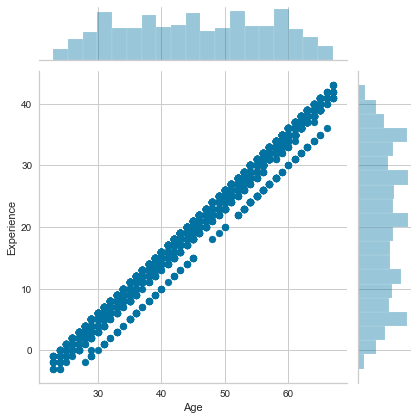

In [12]:
sns.jointplot(df_LoanModelling['Age'], df_LoanModelling['Experience']);

This suggests a more thorough approach that preserves the correlation in the data is not to use the mean for the whole distribution as the imputed value, but to use a linear regression model to predict an Experience value for Age, and use this to impute a value for Experience using the Age for the rows that currently have the invalid negative values for Experience.

In [13]:
# As negative values for Experience are errors, exclude them from the regression model
df_NonNegExp = df_LoanModelling.copy()
indexes = df_NonNegExp[df_NonNegExp['Experience'] < 0].index
df_NonNegExp.drop(indexes,inplace=True)
print("Dropped " + str(indexes.size) + " rows with negative Experience from the training data.")

# Create the datasets for the regression
X = df_NonNegExp[['Age']]
Y = df_NonNegExp[['Experience']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Perform the regression and output the coefficient and intercept and R^2 metrics
linreg_Experience = LinearRegression()
linreg_Experience.fit(X_train, Y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linreg_Experience.coef_[0][idx]))
intercept = linreg_Experience.intercept_[0]
print("Intercept: {}".format(intercept))
print("Training R^2: {}".format(linreg_Experience.score(X_train, Y_train)))
print("Test R^2: {}".format(linreg_Experience.score(X_test, Y_test)))


Dropped 52 rows with negative Experience from the training data.
The coefficient for Age is 0.9932977361902032
Intercept: -24.920937275937145
Training R^2: 0.9882475612464781
Test R^2: 0.9882122761052387


As expected given the extremely high correlation in the data, the R^2 results for train and test are both extremely high. The intercept is noteworthy however, as we know from the statistical analysis at 1.3 above that the min value for Age is 23, whereas eyeballing the values suggests that values for Age of 25 and below will produce a negative predicted value for Experience.

This is shown by applying the model to the min observed value for Age and checking the prediction.

In [14]:
predicted = round((linreg_Experience.predict(np.array([[df_LoanModelling['Age'].min()]]))).item(0))

print("Minimum observed value for Age in the dataset is {}".format(df_LoanModelling['Age'].min()))
print("Experience value predicted for this age is {}".format(predicted))

Minimum observed value for Age in the dataset is 23
Experience value predicted for this age is -2


So, for values of Age where the model predicts a negative value, we will use zero.

In [15]:
# Create a dataframe to capture the results
df_ExpErrors = pd.DataFrame(columns=['Age','Experience','Predicted Experience'])

# Iterate the rows with negative experience, and use the regression model to predict the
# value of Experience based on Age, and impute this value or 0 if the prediction is negative
indexes = df_LoanModelling[df_LoanModelling['Experience'] < 0].index
i = 0
for index in indexes:    
    predict = round((linreg_Experience.predict(np.array([[df_LoanModelling.loc[index,'Age']]]))).item(0))
    df_ExpErrors.loc[i] = [df_LoanModelling.loc[index,'Age'], df_LoanModelling.loc[index,'Experience'], predict]
    i+=1
    if predict < 0:
        df_LoanModelling.loc[index,'Experience'] = 0
    else:
        df_LoanModelling.loc[index,'Experience'] = predict
        
# NOTE: It is understood that iteratively adding individual rows to a pandas dataframe is
# computationally intensive for larger operations, however as we've already established only
# 52 rows are involved this is not considered impactful.


In [16]:
print(df_ExpErrors.shape)

indexes = df_ExpErrors[df_ExpErrors['Predicted Experience'] > 0].index

print("The minimum Age with negative experience was {}".format(df_ExpErrors['Age'].min()))
print("The minimum Age with negative experience was {}".format(df_ExpErrors['Age'].max()))
print("The number of predictions greater than zero was {}".format(indexes.size))
df_ExpErrors['Age'].value_counts()

(52, 3)
The minimum Age with negative experience was 23
The minimum Age with negative experience was 29
The number of predictions greater than zero was 5


25    18
24    17
23    12
29    3 
28    1 
26    1 
Name: Age, dtype: int64

Finally, confirm that there are no more negative values for Experience in the dataframe.

In [17]:
any(df_LoanModelling['Experience'] < 0)

False

### Observations
Interestingly, all the Experience errors occurred for Ages 23 to 29, and as the small number of predictions that were greater than zero shows, the errors cluster around ages 23 to 25 - this strongly suggests the introduction of errors into this dataset in the form of negative values for Experience is *not completely random*.

Although not part of my findings for this model, if this was in a business context I would be sharing this with the client, as it suggests some of the Experience values in this dataset may have already been imputed (as opposed to random errors in data entry).



---
### 1.5.3 Data types

In [18]:
df_LoanModelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Observations

Based on the analysis above and the incoming description of the data in the project brief, there are four changes that need to be made;

1. ID - drop
2. ZIP Code, Family - convert to categorical
3. Education - replace 'lookup' values with string (for later encoding)
4. Personal Loan, Securities Account, CD Account, Online, CreditCard - convert to category

Firstly, the ID column is an index - the summary at 1.3 and 1.3.1 shows it contains 5000 unique values from 1 to 5000. This is neither categorical or continuous data, so should be dropped.

In [19]:
# The "ID" column appears to be an index - confirm by examining number of unique values vs shape
(df_LoanModelling['ID'].unique()).size

5000

In [20]:
df_LoanModelling.drop(['ID'], axis=1, inplace=True)
df_LoanModelling.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0  25   1           49      91107     4       1.6    1          0          
1  45   19          34      90089     3       1.5    1          0          
2  39   15          11      94720     1       1.0    1          0          
3  35   9           100     94112     1       2.7    2          0          
4  35   8           45      91330     4       1.0    2          0          

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0  0              1                   0           0       0           
1  0              1                   0           0       0           
2  0              0                   0           0       0           
3  0              0                   0           0       0           
4  0              0                   0           0       1

Secondly, the ZIP Code column has been interpreted as continuous, whereas ZIP Codes are categorical variables for address/location. Additionally, the fields Personal Loan, Securities Account, CD Account, Online, and CreditCard are also categorical.

In [21]:
# Zip should be categorical
df_LoanModelling['ZIP Code'] = df_LoanModelling['ZIP Code'].astype('object')
df_LoanModelling['Family'] = df_LoanModelling['Family'].astype('object')

# Personal Loan, Securities Account, CD Account, Online, CreditCard should be categorical
df_LoanModelling['Personal Loan'] = df_LoanModelling['Personal Loan'].astype('category')
df_LoanModelling['Securities Account'] = df_LoanModelling['Securities Account'].astype('category')
df_LoanModelling['CD Account'] = df_LoanModelling['CD Account'].astype('category')
df_LoanModelling['Online'] = df_LoanModelling['Online'].astype('category')
df_LoanModelling['CreditCard'] = df_LoanModelling['CreditCard'].astype('category')

In [22]:
df_LoanModelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   object  
 4   Family              5000 non-null   object  
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   category
 9   Securities Account  5000 non-null   category
 10  CD Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(5), float64(1), int64(5), object(2)
memory usage: 337.5+ KB


Finally, Education is actually a categorical variable as well - the values 1, 2, 3 are indexes, which refer to the descriptions of the person's education level, and are not numeric data. To make the data readable later, we'll convert Education to a categorical variable and substitute the values, then one hot encode the data before building the regression model.

In [23]:
df_LoanModelling['Education'] = df_LoanModelling['Education'].astype('object')
df_LoanModelling['Education'].replace(to_replace=1, value="Undergraduate", inplace=True)
df_LoanModelling['Education'].replace(to_replace=2, value="Graduate", inplace=True)
df_LoanModelling['Education'].replace(to_replace=3, value="Advanced/Professional", inplace=True)

In [24]:
df_LoanModelling['Education'].value_counts(normalize=True)

Undergraduate            0.4192
Advanced/Professional    0.3002
Graduate                 0.2806
Name: Education, dtype: float64

In [25]:
df_LoanModelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   object  
 4   Family              5000 non-null   object  
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   object  
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   category
 9   Securities Account  5000 non-null   category
 10  CD Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(5), float64(1), int64(4), object(3)
memory usage: 337.5+ KB


### Observations
The datatypes now match the description of the data in the brief and the results of the analysis above. The continuous variables are Age, Experience, Income, CCAvg, and Mortgage, and the categorical variables are ZIP Code, Family, Education, Personal Loan, Securities Account, CD Account, Online, and CreditCard. We've also prepared Education for later encoding.


#  
---
# Task 2 - Exploratory Data Analysis: Study the data distribution in each attribute and target variable

---
## 2.1 Number of unique in each column?

In [26]:
df_LoanModelling.nunique()

Age                   45 
Experience            44 
Income                162
ZIP Code              467
Family                4  
CCAvg                 108
Education             3  
Mortgage              347
Personal Loan         2  
Securities Account    2  
CD Account            2  
Online                2  
CreditCard            2  
dtype: int64

### Observations

The high number of unique values for ZIP Code (467) suggest it may not be a useful categorical variable. The correlation matrix in the profile report at 1.3.1 (above) also suggests ZIP Code is not correlated with any of the other variables. One approach could be to bin the data to reduce the number of categories, possibly by binning adjacent zip codes, or resampling at a higher level (e.g. county). For the purposes of this analysis though, ZIP Code will be dropped.

In [27]:
df_LoanModelling.drop(labels=['ZIP Code'], axis=1, inplace=True)

##  
---
## 2.2 Number of people with zero mortgage?

In [28]:
indexes = df_LoanModelling[df_LoanModelling['Mortgage'] == 0].index
print("Number of customers with zero mortgage: {}".format(indexes.size))
print(str((indexes.size / df_LoanModelling['Mortgage'].size)*100) + "%")

Number of customers with zero mortgage: 3462
69.24%


### Observations

69.2% of the customers in the dataset (3462 out of 5000) do not have a mortgage with Thera Bank.

##  
---
## 2.3 Number of people with zero credit card spending per month?

In [29]:
indexes = df_LoanModelling[df_LoanModelling['CCAvg'] == 0].index
print("Number of customers with zero credit card spending: {}".format(indexes.size))

Number of customers with zero credit card spending: 106


### Observations

106 out of 5000 customers have zero credit card spending per month. This may be noteworthy later in the analysis of regression models, as Thera Bank's brief specifically nominates "liability customers" as the focus for the personal loan campaign. Customers with no credit card and no credit card spending would not ordinarily be defined as liability customers.

##  
---
## 2.4 Value counts of all categorical columns

In [30]:
for i in list(df_LoanModelling.columns[df_LoanModelling.dtypes=='object']):
    print(df_LoanModelling[i].value_counts())
    print("\n")
    
for i in list(df_LoanModelling.columns[df_LoanModelling.dtypes=='category']):
    print(df_LoanModelling[i].value_counts())
    print("\n")

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


Undergraduate            2096
Advanced/Professional    1501
Graduate                 1403
Name: Education, dtype: int64


0    4520
1    480 
Name: Personal Loan, dtype: int64


0    4478
1    522 
Name: Securities Account, dtype: int64


0    4698
1    302 
Name: CD Account, dtype: int64


1    2984
0    2016
Name: Online, dtype: int64


0    3530
1    1470
Name: CreditCard, dtype: int64




### Observations

As noted in the analysis above, the dependent variable 'Personal Loan' is imbalanced, reflecting the information in the project brief that 9% of customers accepted a personal loan in the last campaign. Of note also are the 'Securities Account' and 'CD Account' columns, which appear to have a similar balance - it will be worth investigating if these are correlated in the bivariate analysis (below).

##  
---
## 2.5 Univariate and Bivariate analysis

---
### 2.5.1 Univariate analysis

### Distribution plots of the continuous independent variables

As per the outcomes of the analysis and preparation steps above, there are five continuous independent variables - Age, Experience, Income, CCAvg, and Mortgage.

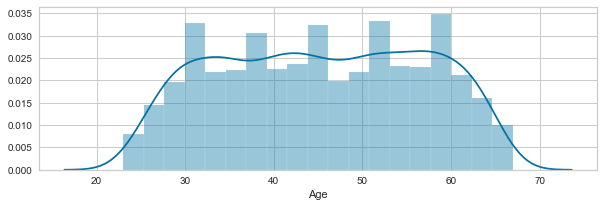

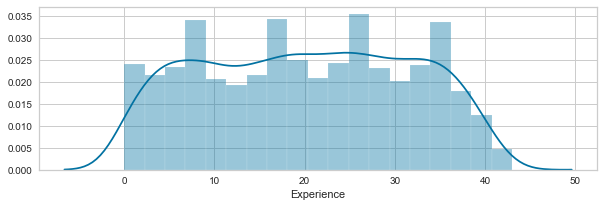

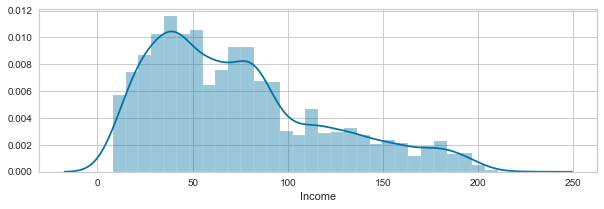

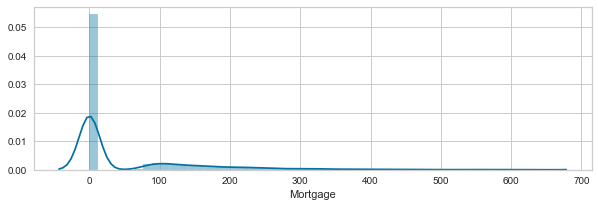

In [31]:
plt.figure(figsize=(10,3))
sns.distplot(df_LoanModelling['Age']);
plt.figure(figsize=(10,3))
sns.distplot(df_LoanModelling['Experience']);
plt.figure(figsize=(10,3))
sns.distplot(df_LoanModelling['Income']);
plt.figure(figsize=(10,3))
sns.distplot(df_LoanModelling['CCAvg']);
plt.figure(figsize=(10,3))
sns.distplot(df_LoanModelling['Mortgage']);

### Observations

'Age' and 'Experience' appear normally distributed. As per the analysis at 1.3 and 1.3.1 above, 'Income', 'CCAvg', and 'Mortgage' are all right skewed. We'll next examine box plots to see the outliers causing the skews.

###  
### Box plots of the continuous independent variables

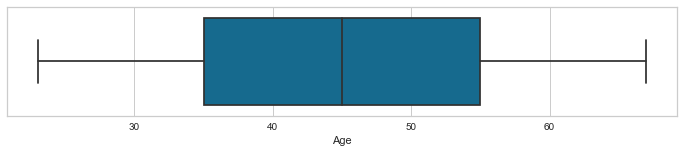

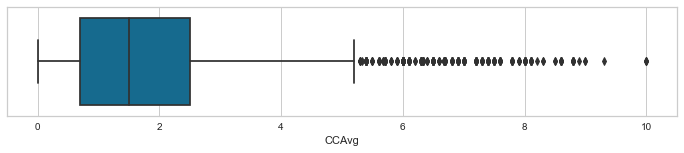

In [32]:
plt.figure(figsize=(12,2))
sns.boxplot(x=df_LoanModelling.Age)
plt.figure(figsize=(12,2))
sns.boxplot(x=df_LoanModelling.Experience)
plt.figure(figsize=(12,2))
sns.boxplot(x=df_LoanModelling.Income)
plt.figure(figsize=(12,2))
sns.boxplot(x=df_LoanModelling.CCAvg)
plt.figure(figsize=(12,2))
sns.boxplot(x=df_LoanModelling.Mortgage)

### Observations

The box plots show both the CCAvg and Mortgage columns are heavily right skewed, with a large number of outliers, with Income being less skewed. An observation of the skewness for the three skewed distributions shows this as well. An observation is that addressing skewness in the independent variables is one option for improving for regression model later, if we're unhappy with its performance.

In [33]:
skewness = pd.DataFrame({'Skewness' : [stats.skew(df_LoanModelling.Income),stats.skew(df_LoanModelling.CCAvg)
                                      ,stats.skew(df_LoanModelling.Mortgage)]},index=['Income','CCAvg','Mortgage'])
skewness

Skewness
Income    0.841086
CCAvg     1.597964
Mortgage  2.103371

###  
### Count plots of the categorical independent variables

As per the outcomes of the analysis and preparation steps above, there are two independent categorical variables (Family and Education) and four independent boolean variables (Securities Account, CD Account, Online, and CreditCard). The dependent variable is Personal Loan.

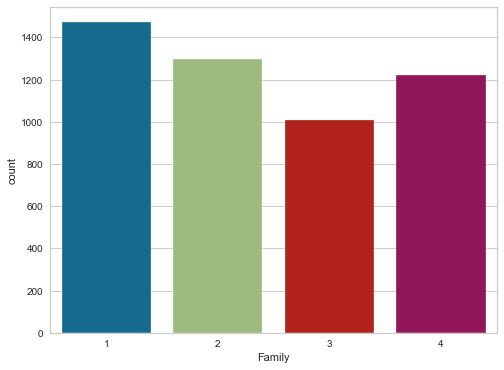

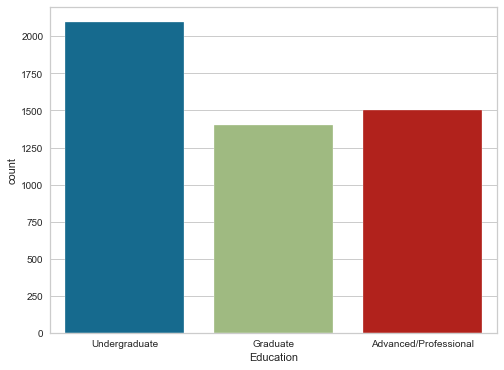

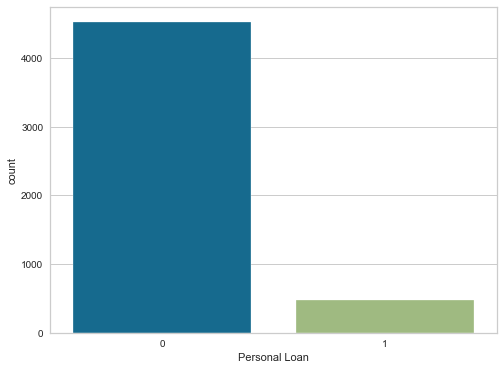

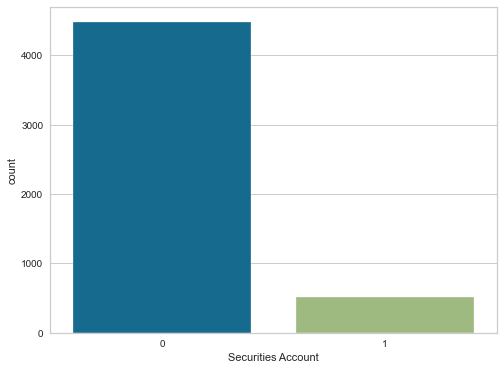

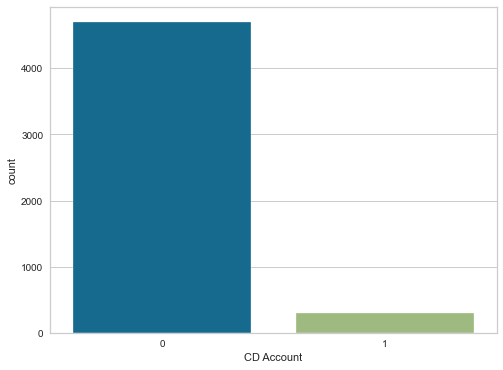

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(df_LoanModelling['Family'])
plt.figure(figsize=(8,6))
sns.countplot(df_LoanModelling['Education'])
plt.figure(figsize=(8,6))
sns.countplot(df_LoanModelling['Personal Loan'])
plt.figure(figsize=(8,6))
sns.countplot(df_LoanModelling['Securities Account'])
plt.figure(figsize=(8,6))
sns.countplot(df_LoanModelling['CD Account'])
plt.figure(figsize=(8,6))
sns.countplot(df_LoanModelling['Online'])
plt.figure(figsize=(8,6))
sns.countplot(df_LoanModelling['CreditCard'])

### Observations

The imbalances noted at 2.4 (above) in the value counts are evident here, with Personal Loan, Securities Account, and CD Account having significantly more False observations than True. In the case of Personal Loan, a False observation means the customer did not take up a personal loan after the last campaign. In each of Securities Account and CD Account, a False observation means the customer does not have that type of account. The same balance is evident for CreditCard, although not to the same ratio. For the categorical variables, the plots show that most customers have a family of 1, and most customers have a Undergraduate level of education.

###  
---
### 2.5.2 Bivariate analysis

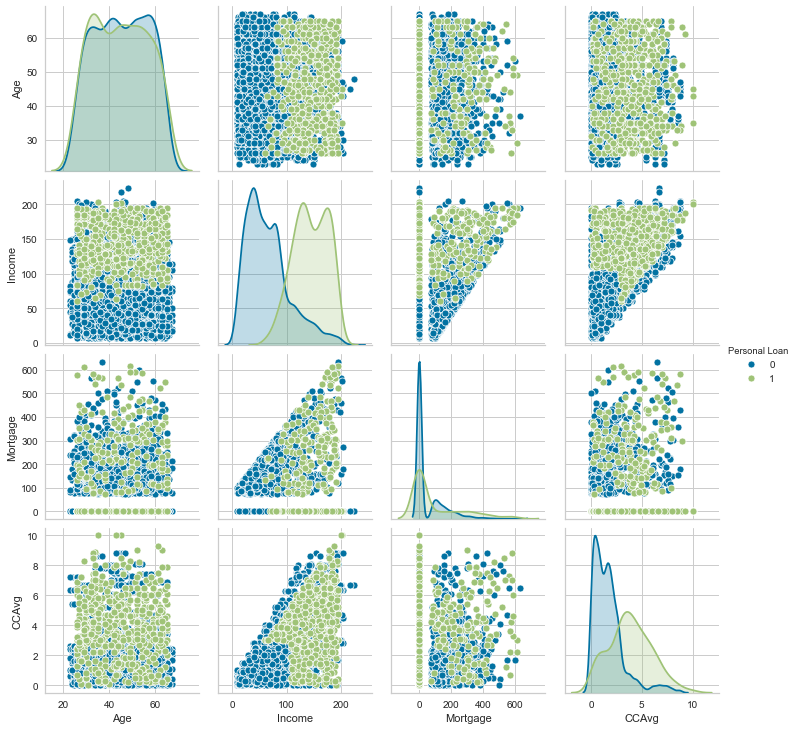

In [35]:
sns.pairplot(df_LoanModelling[['Age', 'Income', 'Mortgage', 'CCAvg', 'Personal Loan']], hue = 'Personal Loan')

### Observations

The highly correlated and linear relationship between Age and Experience has been previously observed in the analysis at 1.3 and at 1.5.2 above in imputing values for the invalid negative values, so Experience is not plotted here as it does not add to the analysis. The distribution of the continuous variables has been discussed in the distribution plots above - however using Personal Loan as the hue divides the Income distribution, with higher income appearing to be more highly correlated with Personal Loan. This is also observed in the scatterplots for Age and Income, with the green plots for Personal Loan increasing as income increases.

The scatterplot for Income and CCAvg show an expected effect with rates of credit card usage increasing as income increases, however it is clear there are many high income customers who do not use credit cards. The same plot is evident for Income and Mortgage. The visualisation between Age and Mortgage, and Age and CCAvg shows no apparent pattern, reflecting the low correlations observed in the matrix at 1.3.1.

###  
---
### 2.5.3 Dependent variable analysis


###  Categorical variables and the dependent variable

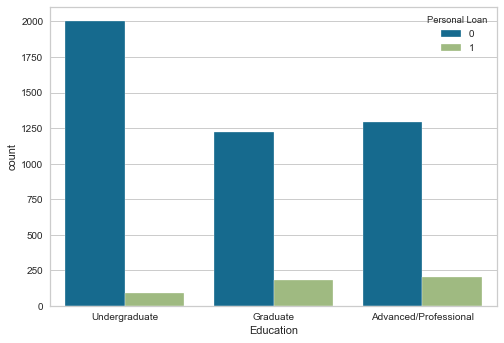

In [36]:
sns.countplot(df_LoanModelling['Education'], hue=df_LoanModelling['Personal Loan'])

We're interested in the rate of observations for the dependent variable for each independent categorical variable - this side by side countplot makes the rate difficult to compare, so these will be plotted using crosstab to normalise the observations. 

The same visualisation above plotting using a crosstab is below.

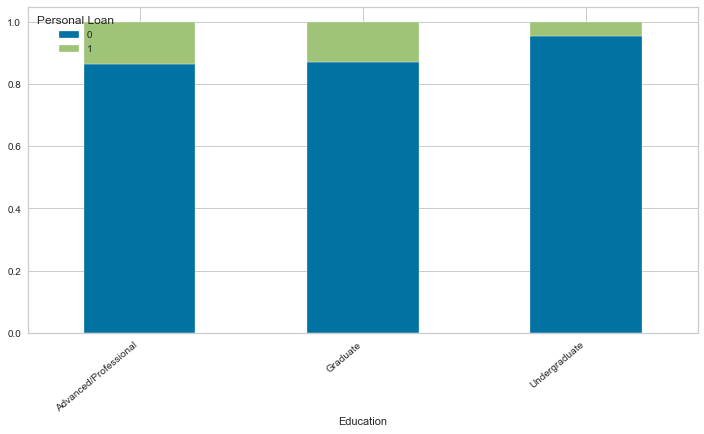

In [37]:
dva = pd.crosstab(df_LoanModelling['Education'], df_LoanModelling['Personal Loan'])
ax = dva.div(dva.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True, figsize=(12,6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

This visualisation suggests that people with higher levels of eduction accept personal loans at a higher rate than Undergraduates.

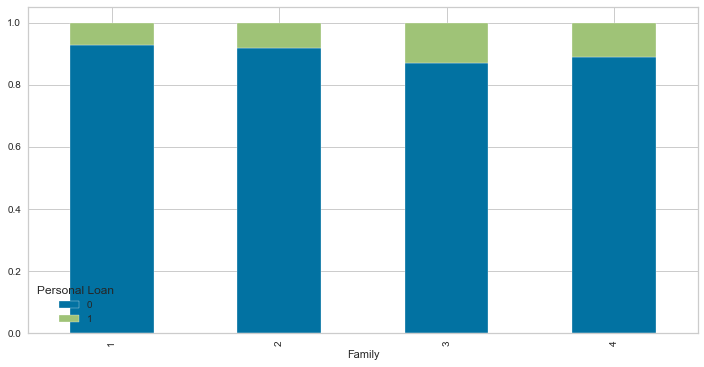

In [38]:
dva = pd.crosstab(df_LoanModelling['Family'], df_LoanModelling['Personal Loan'])
dva.div(dva.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True, figsize=(12,6))

This visualisation shows a slight increase in the rate of personal loan acceptance for customers with a family of 3, however the effect seems quite modest.

In terms of the boolean variables, as we have noted in 1.3.1 and 2.4 above there are similar scales of imbalance in CD Account and Securities Account - plotting these with Personal Loan will help visualise the relationship.

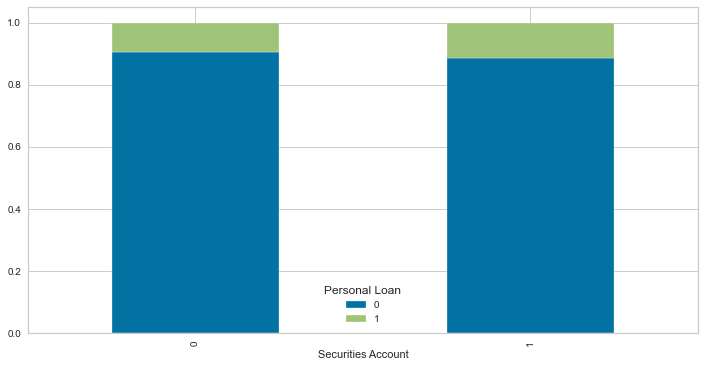

In [39]:
dva = pd.crosstab(df_LoanModelling['Securities Account'], df_LoanModelling['Personal Loan'])
dva.div(dva.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True, figsize=(12,6))

A customer having a securities account appears to not be correlated with them also accepting a personal loan.

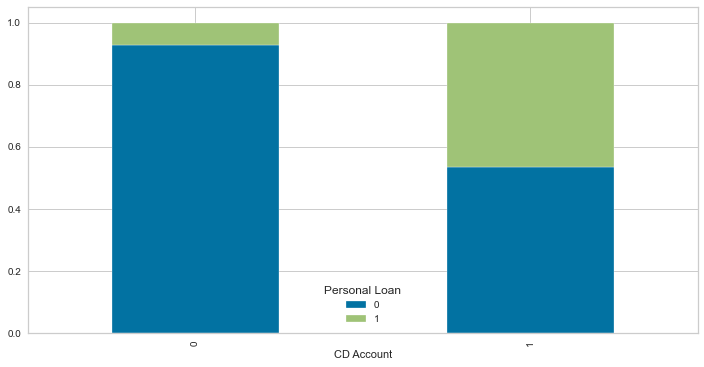

In [40]:
dva = pd.crosstab(df_LoanModelling['CD Account'], df_LoanModelling['Personal Loan'])
dva.div(dva.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True, figsize=(12,6))

Customers who have a CD Account accepted personal loans at a higher rate than customers without CD Accounts in the last campaign.

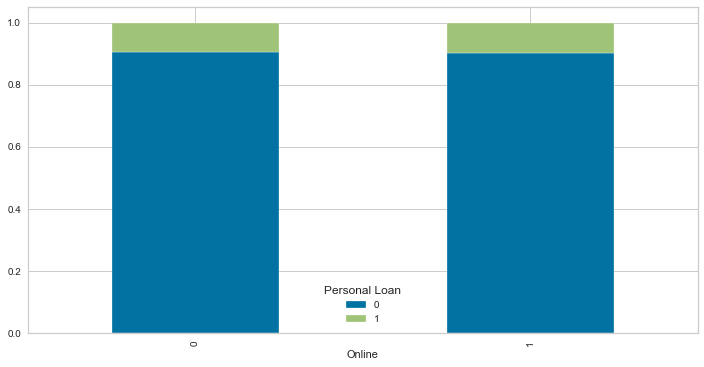

In [41]:
dva = pd.crosstab(df_LoanModelling['Online'], df_LoanModelling['Personal Loan'])
dva.div(dva.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True, figsize=(12,6))

Whether a customer uses online banking services appears to make no difference to the rate at which they accepted personal loans.

In [42]:
dva = pd.crosstab(df_LoanModelling['CreditCard'], df_LoanModelling['Personal Loan'])
dva.div(dva.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True, figsize=(12,6))

The same effect for Online (above) is apparent for CreditCard.

###  
### Continuous independent variables and the dependent variable
Finally, in In the profile analysis at 1.3.1 above, noted that 'Income' and 'CCAvg' showed correlations to 'Personal Loan'.

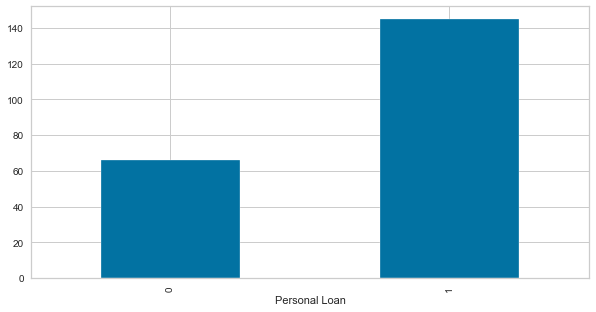

In [43]:
df_LoanModelling.groupby('Personal Loan')['Income'].mean().plot(kind='bar', figsize=(10,5))

This graph plots the average income of customers who accepted a personal loan in the last campaign, against the average income of customers who did not accept a personal loan. This shows clearly the correlation noted at 1.3.1 above - customers who accepted a personal loan have a higher average income (over 140,000), than customers who did not accept a loan (approximately 65,000).

In [44]:
df_LoanModelling.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar', figsize=(10,5))

Similarly, this graph plots the average monthly credit card usage of customers who accepted a personal loan in the last campaign, against the average monthly credit card usage of customers who did not accept a personal loan. This shows the same correlation noted above - customers who accepted a personal loan have a higher average rate of monthly credit card usage. This may be significant given the client intends to target "liability customers".

##  
---
## 2.6 Prepare data model

In [45]:
X = df_LoanModelling.drop(labels=['Personal Loan'], axis=1)
Y = df_LoanModelling[['Personal Loan']]

X = pd.get_dummies(X,drop_first=True)

### Observations

The data model has already been prepared in the analysis steps above, so all that is required now is to create the X and Y sets.

#  
---
# Task 3 - Split the data into training and test set in the ratio of 70:30 respectively

---
## 3.1 Split the data

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

##  
---
## 3.2 Check the quality of the split

In [47]:
print("{0:0.2f}% data is in the Training set".format((len(X_train)/len(df_LoanModelling.index)) * 100))
print("{0:0.2f}% data is in the Test set".format((len(X_test)/len(df_LoanModelling.index)) * 100))

70.00% data is in the Training set
30.00% data is in the Test set


### Observations

Employing good practice to check the split of the data, confirms that the split is 70:30.

In [48]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df_LoanModelling.loc[df_LoanModelling['Personal Loan'] == 1]), (len(df_LoanModelling.loc[df_LoanModelling['Personal Loan'] == 1])/len(df_LoanModelling.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df_LoanModelling.loc[df_LoanModelling['Personal Loan'] == 0]), (len(df_LoanModelling.loc[df_LoanModelling['Personal Loan'] == 0])/len(df_LoanModelling.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(Y_train.loc[Y_train['Personal Loan'] == 1]), (len(Y_train.loc[Y_train['Personal Loan'] == 1])/len(Y_train.index)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(Y_train.loc[Y_train['Personal Loan'] == 0]), (len(Y_train.loc[Y_train['Personal Loan'] == 0])/len(Y_train.index)) * 100))
print("")
print("Testing Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(Y_test.loc[Y_test['Personal Loan'] == 1]), (len(Y_test.loc[Y_test['Personal Loan'] == 1])/len(Y_test.index)) * 100))
print("Testing Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(Y_test.loc[Y_test['Personal Loan'] == 0]), (len(Y_test.loc[Y_test['Personal Loan'] == 0])/len(Y_test.index)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Testing Personal Loan True Values    : 149 (9.93%)
Testing Personal Loan False Values   : 1351 (90.07%)



### Observations

Checking that in the split, the balance of the dependent variable has remained consistent with the source data. The training and test sets show very similar balance to the source data set.

#  
---
# Task 4 - Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance

---
## 4.1 Logit analysis

In [49]:
logit_PersonalLoan = sm.Logit(Y_train, sm.add_constant(X_train))
lg = logit_PersonalLoan.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.107509
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.6565
Time:                        23:37:09   Log-Likelihood:                -376.28
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                8.942e-299
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -8.9197      2.205     -4.045      0.000     -13.242  

### Observations

The logit regression has produced a pseudo R^2 of 0.6565 which indicates that 65.65% of the uncertainty of the intercept model is explained. The regression result also notes that the data contains quasi-separation, which suggests there are some variables that separate the data with little overlap. The result of plots like Income and CCAvg with Personal Loan hue (above) show some candidates where there appears to be little overlap in the data, however as it is quasi-separation we will continue for now.

##  
---
## 4.2 Logistic regression model

Noting we have established in the exploratory data analysis that wew have an imbalanced dependent variable, we will the _class_weight='balanced'_ parameter for the regression model.

Firstly, create a dataframe to store the results for each regression model, so they are easier to visualise and compare.

In [50]:
df_ModelComparison = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score', 'Recall', 'Precision', 'F1 Score', 'ROC AUC Score'])

Then perform the regression, and then the prediction.

In [51]:
logreg_PersonalLoan = LogisticRegression(random_state=42, class_weight='balanced')
logreg_PersonalLoan.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
Y_predict = logreg_PersonalLoan.predict(X_test)

Define a function to draw a confusion matrix.

In [53]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [54]:
print('Confusion Matrix')
print(draw_cm(Y_test,Y_predict))

train_score = round(logreg_PersonalLoan.score(X_train,Y_train),5)
test_score = round(logreg_PersonalLoan.score(X_test, Y_test), 5)
recall = round(recall_score(Y_test,Y_predict), 5)
precision = round(precision_score(Y_test,Y_predict), 5)
f1score = round(f1_score(Y_test,Y_predict), 5)
rocauc_score = round(roc_auc_score(Y_test,Y_predict), 5)
df_ModelComparison.loc[0] = ['1 - Default Balanced Class', train_score, test_score, recall, precision, f1score, rocauc_score]
pd.options.display.float_format = "{:.5f}".format
df_ModelComparison

Confusion Matrix


None


Model  Train Score  Test Score  Recall  Precision  \
0  1 - Default Balanced Class 0.91314      0.91200     0.87248 0.53498      

   F1 Score  ROC AUC Score  
0 0.66327   0.89442

### Observations

To return briefly to the project objective, the classification goal is to predict the likelihood of a liability customer buying personal loans - this is to support the bank in its goal of converting liability customers to personal loan customers.

So, the business context for this model is critical, and this means the priority for this model is to reduce false negative predictions - that is, the model predicting that a customer will not accept a personal loan, whereas the observed result in the test data is that the customer did accept a personal loan. The cost to the bank for this error is the lost interest revenue from a customer who would have accepted a loan, whereas the cost to the bank of the model predicting a customer would accept a loan who then doesn't accept a loan is negligible - perhaps the cost of sending some correspondence to make the offer.

This means that Recall, which is sensitive to the rate of false negative predictions, is a key metric when considering the business problem being solved. In this first instance, the model has produced a high recall of 0.87248, with 130 of the 149 positive observations predicted correctly.

#  
---
# Task 5 - Give your reasoning on how can the model perform better?

Within the context of logistic regression only, I have considered four strategies for how the model could perform better.

1. Examine different parameters for the regression
2. Examine the effect of different thresholds on the prediction
3. Examine the effect of independent variables
4. Examine the effect of narrowing to "liability" customers (as per project brief)

---
## 5.1 Examine different parameters for the regression

This routine creates an array of tuples of penalty and solver, then iterates the array using the tuple for the logistic regression parameters each time, and populates a dataframe with the results, which are sorted by Test Score then Train Score.

In [55]:
df_SolverTest = pd.DataFrame(columns=['Penalty','Solver','Train Score', 'Test Score'])

solvers = [('l2', 'newton-cg'), ('l2', 'lbfgs'), ('l2', 'liblinear'), ('l2', 'sag'), ('l2', 'saga'), ('l1', 'liblinear'), ('l1', 'saga')]
i = 0
for penalty, solver in solvers:
    logreg_SolverTest = LogisticRegression(random_state=42, penalty=penalty, solver=solver, class_weight='balanced')
    logreg_SolverTest.fit(X_train, Y_train)
    df_SolverTest.loc[i] = [penalty, solver, round(logreg_SolverTest.score(X_train, Y_train),5), round(logreg_SolverTest.score(X_test, Y_test),5)]
    i+=1

df_SolverTest.sort_values(by=['Test Score', 'Train Score'], ascending=False, inplace=True)
df_SolverTest.reset_index(drop=True,inplace=True)
df_SolverTest

Penalty     Solver  Train Score  Test Score
0  l1      liblinear 0.91743      0.91400    
1  l2      newton-cg 0.91600      0.91400    
2  l2      lbfgs     0.91314      0.91200    
3  l2      liblinear 0.91400      0.91133    
4  l2      sag       0.86543      0.85200    
5  l2      saga      0.85829      0.84800    
6  l1      saga      0.85829      0.84733

The liblinear solver with l1 penalty produced the highest test and train score, but the model is still slightly overfit.

The next routine uses the outcome of the penalty and solver test, and then iterates an array of different values for C, and outputs the results to a dataframe, again sorted by Test and then Train score.

In [56]:
df_CTest = pd.DataFrame(columns=['C', 'Train Score', 'Test Score'])
penalty = df_SolverTest.loc[0,'Penalty']
solver = df_SolverTest.loc[0,'Solver']

C_parameters = [0.01,0.1,0.25,0.5,0.75,1]
i = 0
for C in C_parameters:
    logreg_CTest = LogisticRegression(random_state=42, C=C, penalty=penalty, solver=solver, class_weight='balanced')
    logreg_CTest.fit(X_train, Y_train)
    df_CTest.loc[i] = [C, round(logreg_CTest.score(X_train,Y_train),5), round(logreg_CTest.score(X_test, Y_test),5)]
    i+=1
    
df_CTest.sort_values(by=['Test Score', 'Train Score'], ascending=False, inplace=True)
df_CTest.reset_index(drop=True,inplace=True)
print("Penalty: {}".format(penalty))
print("Solver: {}".format(solver))
df_CTest

Penalty: l1
Solver: liblinear


C  Train Score  Test Score
0 0.10000 0.91200      0.91667    
1 1.00000 0.91743      0.91400    
2 0.75000 0.91686      0.91400    
3 0.50000 0.91514      0.91267    
4 0.25000 0.91257      0.91267    
5 0.01000 0.86971      0.86800

At a C value of 0.1, the highest Test score is observed - the model is also no longer overfit.

Confusion Matrix


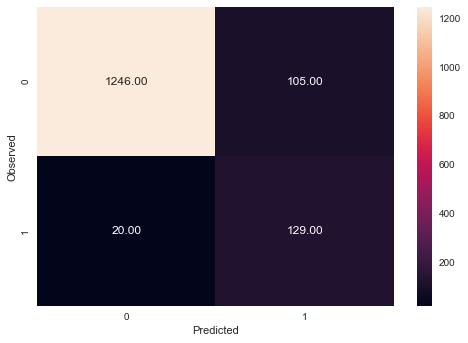

None


Model  Train Score  Test Score  Recall  Precision  \
0  1 - Default Balanced Class 0.91314      0.91200     0.87248 0.53498      
1  2 - Optimised Parameters   0.91200      0.91667     0.86577 0.55128      

   F1 Score  ROC AUC Score  
0 0.66327   0.89442         
1 0.67363   0.89403

In [57]:
penalty = df_SolverTest.loc[0,'Penalty']
solver = df_SolverTest.loc[0,'Solver']
C = df_CTest.loc[0, 'C']

logreg_PersonalLoan_v2 = LogisticRegression(random_state=42, penalty=penalty, solver=solver, C=C, class_weight='balanced') 
logreg_PersonalLoan_v2.fit(X_train, Y_train)
Y_predict = logreg_PersonalLoan_v2.predict(X_test)

print('Confusion Matrix')
print(draw_cm(Y_test,Y_predict))

train_score = round(logreg_PersonalLoan_v2.score(X_train,Y_train), 5)
test_score = round(logreg_PersonalLoan_v2.score(X_test, Y_test), 5)
recall = round(recall_score(Y_test,Y_predict), 5)
precision = round(precision_score(Y_test,Y_predict), 5)
f1score = round(f1_score(Y_test,Y_predict), 5)
rocauc_score = round(roc_auc_score(Y_test,Y_predict), 5)
df_ModelComparison.loc[1] = ['2 - Optimised Parameters', train_score, test_score, recall, precision, f1score, rocauc_score]
df_ModelComparison.sort_values(by=['Recall', 'ROC AUC Score'], ascending=False, inplace=True)
df_ModelComparison.reset_index(drop=True,inplace=True)
df_ModelComparison

### Observations

Although optimising the parameters has increased the Precision and F1 Score, it produces a lower Recall and slightly lower AUC Score. The impact of the Recall performance is that 1 fewer positive loan responses were correctly predicted, so the default parameters actually performed better in the context of this business problem.

##  
---
## 5.2 Examine the effect of different thresholds on the prediction

The next strategy is to use the regression model to predict probabilities, instead of predicting a value, and to then examine the effect of different thresholds at which the probability of a positive value (i.e. the acceptance of a loan) is used to impute the positive value.

This first routine uses predict_proba on the first regression model to output the probabilities to a dataframe, then iterates an array of thresholds at which which the probability imputes a positive value, and then calculates the ROC AUC Score against the test data. The resulting array is sorted by the AUC Score.

In [58]:
df_ThresholdTest = pd.DataFrame(columns=['Threshold', 'ROC AUC Score'])

Y_actual = pd.DataFrame()
Y_actual['Observed'] = Y_test['Personal Loan']
Y_actual.reset_index(drop=True,inplace=True)

Y_predict_proba = pd.concat([Y_actual, pd.DataFrame(logreg_PersonalLoan.predict_proba(X_test))], axis=1)
Y_predict_proba.rename(columns ={0:'Prob_0', 1:'Prob_1'}, inplace=True)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
i = 0
for threshold in thresholds:
    Y_predict_proba['Predicted'] = Y_predict_proba.Prob_1.map( lambda x: 1 if x > threshold else 0)
    df_ThresholdTest.loc[i] = [threshold, roc_auc_score(Y_test,Y_predict_proba['Predicted'])]
    i+=1

df_ThresholdTest.sort_values(by=['ROC AUC Score'], ascending=False, inplace=True)
df_ThresholdTest.reset_index(drop=True,inplace=True)
df_ThresholdTest

Threshold  ROC AUC Score
0 0.40000    0.90126       
1 0.50000    0.89442       
2 0.60000    0.88428       
3 0.30000    0.88169       
4 0.70000    0.86928       
5 0.20000    0.86736       
6 0.80000    0.84275       
7 0.10000    0.82410       
8 0.90000    0.79237

A threshold of 0.4 produced an AUC score of 0.90126, so now create a prediction model using this threshold and output a confusion matrix.

In [59]:
threshold = df_ThresholdTest.loc[0, 'Threshold']
Y_predict_proba['Predicted'] = Y_predict_proba.Prob_1.map( lambda x: 1 if x > threshold else 0)

print('Confusion Matrix')
print(draw_cm(Y_test,Y_predict_proba['Predicted']))

train_score = round(logreg_PersonalLoan.score(X_train,Y_train), 5)
test_score = round(logreg_PersonalLoan.score(X_test, Y_test) ,5)
recall = round(recall_score(Y_test,Y_predict_proba['Predicted']), 5)
precision = round(precision_score(Y_test,Y_predict_proba['Predicted']), 5)
f1score = round(f1_score(Y_test,Y_predict_proba['Predicted']), 5)
rocauc_score = round(roc_auc_score(Y_test,Y_predict_proba['Predicted']), 5)
df_ModelComparison.loc[2] = ['3 - Probability Thresholds', train_score, test_score, recall, precision, f1score, rocauc_score]
df_ModelComparison.sort_values(by=['Recall', 'ROC AUC Score'], ascending=False, inplace=True)
df_ModelComparison.reset_index(drop=True,inplace=True)
df_ModelComparison


Confusion Matrix


None


Model  Train Score  Test Score  Recall  Precision  \
0  3 - Probability Thresholds 0.91314      0.91200     0.91946 0.46441      
1  1 - Default Balanced Class 0.91314      0.91200     0.87248 0.53498      
2  2 - Optimised Parameters   0.91200      0.91667     0.86577 0.55128      

   F1 Score  ROC AUC Score  
0 0.61712   0.90126         
1 0.66327   0.89442         
2 0.67363   0.89403

### Observations

Using probabilities and a threshold of 0.4 to make the prediction has increased the Recall to 0.91946, with 137 of the 149 positive observations correctly predicted. The ROC AUC Score has also increased. This comes at the cost of a lower precision score as the low probability threshold (0.4) means the rate of false positives has increased. However, as noted in the observations under the default model above, in the business context for this model this means the bank would only miss 12 customers who would have taken up a loan, and there is no real cost to offering a loan to a customer who doesn't accept it. So, this model is preferred to the first model.

##  
---
## 5.3 Examine the effect of independent variables

The logit result above showed a number of variables with P>|z| scores that suggest they may not be relevant to the regression, as per below.

In [60]:
logit_PersonalLoan = sm.Logit(Y_train, sm.add_constant(X_train))
lg = logit_PersonalLoan.fit()
print(lg.summary())


Optimization terminated successfully.
         Current function value: 0.107509
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.6565
Time:                        23:37:13   Log-Likelihood:                -376.28
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                8.942e-299
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -8.9197      2.205     -4.045      0.000     -13.242  

Use the logit to produce a dataframe which lists the odds ratio and probability for the independent variables, filtered for a value of p <= 0.1.

In [61]:
lg_Coef = pd.DataFrame(lg.params, columns=['coef'])
lg_Coef.loc[:, "Odds_Ratio"] = np.exp(lg_Coef.coef)
lg_Coef['Probability'] = lg_Coef['Odds_Ratio']/(1+lg_Coef['Odds_Ratio'])
lg_Coef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format
lg_Coef = lg_Coef.sort_values(by="Odds_Ratio", ascending=False)
pval_filter = lg_Coef['pval']<=0.1
pd.options.display.float_format = "{:.2f}".format
lg_Coef[pval_filter]

coef  Odds_Ratio  Probability  pval
CD Account_1            3.71  40.79       0.98         0.00 
Family_3                2.49  12.04       0.92         0.00 
Family_4                1.64  5.16        0.84         0.00 
CCAvg                   0.25  1.28        0.56         0.00 
Income                  0.06  1.06        0.52         0.00 
Online_1                -0.59 0.56        0.36         0.00 
CreditCard_1            -1.00 0.37        0.27         0.00 
Securities Account_1    -1.07 0.34        0.26         0.01 
Education_Undergraduate -4.27 0.01        0.01         0.00 
const                   -8.92 0.00        0.00         0.00

Drop the excluded columns from the dataset.

In [62]:
X.drop(['Age','Experience','Mortgage','Family_2','Education_Graduate'],axis=1,inplace=True)
print(X.columns)

Index(['Income', 'CCAvg', 'Family_3', 'Family_4', 'Education_Undergraduate',
       'Securities Account_1', 'CD Account_1', 'Online_1', 'CreditCard_1'],
      dtype='object')


Resplit the data as X has changed, and redo the logit fit.

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)
logit = sm.Logit(Y_train, sm.add_constant(X_train))
lg = logit.fit()

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.107951
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.6551
Time:                        23:37:13   Log-Likelihood:                -377.83
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.856e-303
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -9.1052      0.492    -18.497      0.000     -10.070   

Note that the quasi-separation is still present, although as above the model is giving good predictions and the data is not completely separated, so we will continue.

Redo the regression with the default parameters using the new datasets with the irrelevant independent variables removed.

In [64]:
logreg_PersonalLoan_v3 = LogisticRegression(random_state=42, class_weight='balanced') 
logreg_PersonalLoan_v3.fit(X_train, Y_train)
Y_predict = logreg_PersonalLoan_v3.predict(X_test)

print('Confusion Matrix')
print(draw_cm(Y_test,Y_predict))

train_score = round(logreg_PersonalLoan_v3.score(X_train,Y_train), 5)
test_score = round(logreg_PersonalLoan_v3.score(X_test, Y_test), 5)
recall = round(recall_score(Y_test,Y_predict), 5)
precision = round(precision_score(Y_test,Y_predict), 5)
f1score = round(f1_score(Y_test,Y_predict), 5)
rocauc_score = round(roc_auc_score(Y_test,Y_predict), 5)
df_ModelComparison.loc[3] = ['4 - Removed Irrelevant Variables', train_score, test_score, recall, precision, f1score, rocauc_score]

df_ModelComparison.sort_values(by=['Recall', 'ROC AUC Score'], ascending=False, inplace=True)
df_ModelComparison.reset_index(drop=True,inplace=True)
pd.options.display.float_format = "{:.5f}".format
df_ModelComparison

Confusion Matrix


None


Model  Train Score  Test Score  Recall  \
0  3 - Probability Thresholds       0.91314      0.91200     0.91946   
1  4 - Removed Irrelevant Variables 0.91543      0.91467     0.87248   
2  1 - Default Balanced Class       0.91314      0.91200     0.87248   
3  2 - Optimised Parameters         0.91200      0.91667     0.86577   

   Precision  F1 Score  ROC AUC Score  
0 0.46441    0.61712   0.90126         
1 0.54393    0.67010   0.89590         
2 0.53498    0.66327   0.89442         
3 0.55128    0.67363   0.89403

### Observations

This model slightly outperforms the original model, but only in terms of a fractionally higher (0.8959 vs 0.8944) ROC AUC Score - the Recall scores are identical, with the model also predicting 130 of the 149 positive results. As such, the model using probability thresholds is still the preferred model.

##  
---
## 5.4 Examine the effect of narrowing to "liability" customers (as per project brief)

Finally, it is noteworthy that the customer's objective pertains to "liability" customers - that is, the bank is not targeting customers who do not have a credit card and have zero monthly usage (I've excluded Mortgage customers as "liability" customers, since a mortgage is secured against the property). We also know we have an imbalanced dependent variable, so it's worth examining whether exluding non-liability customers from the data affects the imbalance and improves the prediction.

Firstly, make a copy of the main dataframe, and drop all the rows where there is no credit card AND no monthly spend.

In [65]:
df = df_LoanModelling.copy()
indexes = df[(df['CreditCard'] == 0) & (df['CCAvg'] == 0)].index
df.drop(indexes,inplace=True)
df.shape

(4922, 12)

This has dropped 78 rows from the data. So, recreate the X and Y data and resplit, and run the regression again with the default parameters and output the results.

In [66]:
X = df.drop(labels=['Personal Loan'], axis=1)
Y = df[['Personal Loan']]
X = pd.get_dummies(X,drop_first=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

logreg_PersonalLoan_v4 = LogisticRegression(random_state=42, class_weight='balanced')
logreg_PersonalLoan_v4.fit(X_train, Y_train)

Y_predict = logreg_PersonalLoan_v4.predict(X_test)

print('Confusion Matrix')
print(draw_cm(Y_test,Y_predict))
train_score = round(logreg_PersonalLoan_v4.score(X_train,Y_train), 5)
test_score = round(logreg_PersonalLoan_v4.score(X_test, Y_test), 5)
recall = round(recall_score(Y_test,Y_predict), 5)
precision = round(precision_score(Y_test,Y_predict), 5)
f1score = round(f1_score(Y_test,Y_predict), 5)
rocauc_score = round(roc_auc_score(Y_test,Y_predict), 5)
df_ModelComparison.loc[4] = ['5 - Liability Customers Only', train_score, test_score, recall, precision, f1score, rocauc_score]
df_ModelComparison.sort_values(by=['Recall', 'ROC AUC Score'], ascending=False, inplace=True)
df_ModelComparison.reset_index(drop=True,inplace=True)

df_ModelComparison

Confusion Matrix


None


Model  Train Score  Test Score  Recall  \
0  3 - Probability Thresholds       0.91314      0.91200     0.91946   
1  4 - Removed Irrelevant Variables 0.91543      0.91467     0.87248   
2  1 - Default Balanced Class       0.91314      0.91200     0.87248   
3  5 - Liability Customers Only     0.90479      0.91334     0.87121   
4  2 - Optimised Parameters         0.91200      0.91667     0.86577   

   Precision  F1 Score  ROC AUC Score  
0 0.46441    0.61712   0.90126         
1 0.54393    0.67010   0.89590         
2 0.53498    0.66327   0.89442         
3 0.50885    0.64246   0.89434         
4 0.55128    0.67363   0.89403

### Observations

Removing the non-liability customers had no real effect on the model - a fractionally lower Recall and RUC AUC Score.

So, the strategy that gave the best result for improving the model was using probabilty thresholds - this improved Recall from 0.87248 to 0.91946, and improved the ROC AUC Score from 0.89442 to 0.90126.

Further strategies for improvement could include addressing the imbalance in the target variable using oversampling, or addressing the skewness in the independent variables by dropping outliers, or using a scaler - however, a Recall of 91.2% on the full dataset is a good result.

#  
---
# Task 6 - Give Business understanding of your model?

---
## 6.1 Final Model

Below is the final model as per the outcome of section 5 (above) and metrics.

In [67]:
X = df_LoanModelling.drop(labels=['Personal Loan'], axis=1)
Y = df_LoanModelling[['Personal Loan']]
X = pd.get_dummies(X,drop_first=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)
logreg_PersonalLoan = LogisticRegression(random_state=42, class_weight='balanced')
logreg_PersonalLoan.fit(X_train, Y_train)
Y_actual = pd.DataFrame()
Y_actual['Observed'] = Y_test['Personal Loan']
Y_actual.reset_index(drop=True,inplace=True)
Y_predict_proba = pd.concat([Y_actual, pd.DataFrame(logreg_PersonalLoan.predict_proba(X_test))], axis=1)
Y_predict_proba.rename(columns ={0:'Prob_0', 1:'Prob_1'}, inplace=True)
threshold = df_ThresholdTest.loc[0, 'Threshold']
Y_predict_proba['Predicted'] = Y_predict_proba.Prob_1.map( lambda x: 1 if x > threshold else 0)
print('Confusion Matrix')
print(draw_cm(Y_test,Y_predict_proba['Predicted']))

df_ModelComparison


Confusion Matrix


None


Model  Train Score  Test Score  Recall  \
0  3 - Probability Thresholds       0.91314      0.91200     0.91946   
1  4 - Removed Irrelevant Variables 0.91543      0.91467     0.87248   
2  1 - Default Balanced Class       0.91314      0.91200     0.87248   
3  5 - Liability Customers Only     0.90479      0.91334     0.87121   
4  2 - Optimised Parameters         0.91200      0.91667     0.86577   

   Precision  F1 Score  ROC AUC Score  
0 0.46441    0.61712   0.90126         
1 0.54393    0.67010   0.89590         
2 0.53498    0.66327   0.89442         
3 0.50885    0.64246   0.89434         
4 0.55128    0.67363   0.89403

In [68]:
logit_roc_auc = roc_auc_score(Y_test, Y_predict_proba['Predicted'])
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict_proba['Predicted'])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Personal Loan acceptance')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##  
---
## 6.2 Business understanding & conclusion

So, the final model produces a logistic regression model using the default parameters, with the class_weight='balanced' parameter to address the imbalance in the target variable. The model is then used to predict probabilities, with any probability above 0.4 imputed to be positive.

The results of this model on the test data were;
* True Positive (predicted 1, observed 1) - model correctly predicted 137 would accept a loan
* False Positive (predicted 1, observed 0) - model incorrectly predicted 158 would accept a loan
* True Negative (predicted 0, observed 0) - model correctly predicted 1193 would decline a loan
* False Negative (predicted 0, observed 1) - model incorrectly predicted 12 would decline a loan

In the context of the business objectives of the client, false negatives come at a higher cost than false positives. This is because a false negative costs the bank money in lost business (because a loan is not offered to someone who would accept it), whereas a false positive costs nothing (a customer simply declines the offer). 

This means Recall is the key metric, and this model produces a Recall of 91.9% with 137 of 149 positive observations predicted. The model also has a high ROC AUC score of 0.90126.

In terms of the business outcome, this means that a campaign based on this model is likely to reach 91.9% of the customers who would accept a personal loan.